## Całkowanie numeryczne podstawy 

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów :


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import scipy.integrate as integrate


def rectangular_rule(f, a, b, n):
    sum = 0.0
    dx = float(b - a)/ n
    for i in range(0, n):
        sum = sum + f((a + (i * dx)))
    return dx*sum

* wzór trapezów :


In [0]:
def trapezoidal_rule(f, a, b, n):
    dx = float(b - a) / n
    sum = 0.0
    sum += f(a)/2.0
    for i in range(1, n):
        sum += f(a + i*dx)
    sum += f(b)/2.0
    return sum * dx

* wzór Simpsona :

In [0]:
def simpson_rule(f, a, b, n):
    dx = float(b - a) /n
    sum = 0.0
    x = a + dx
    for i in range(1, int(n/2 + 1)):
        sum += 4*f(x)
        x += 2*dx

    x = a + 2*dx
    for i in range(1, int(n/2)):
        sum += 2*f(x)
        x += 2*dx
    return (dx / 3)*(f(a) + f(b) + sum)

#### Zadanie 2"
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)


In [0]:
f1 = lambda x: x
f2 = lambda x: 2 * x ** 2
f3 = lambda x: 4 * np.math.sin(x)
f4 = lambda x: np.exp(x)
f5 = lambda x: x * np.math.sin(x) ** 2 + 2 * np.math.cos(x)
f6 = lambda x: np.math.cos((x + 1) / (x ** 2 + 0.04)) * np.exp(x)


def function_visualization(f, a, b, n, func_name):
    x = np.linspace(a, b, n)
    plt.plot(x, np.vectorize(f)(x), label=func_name)
    plt.title(func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.show()


def calculate_integral(f, a, b, n, func_name):
    function_visualization(f, a, b, n, func_name)
    rec_val = rectangular_rule(f, -a, b, n)
    trap_val = trapezoidal_rule(f, -a, b, n)
    sim_val = simpson_rule(f, -a, b, n)
    numpy_val = integrate.quad(f, a, b)[0]
    table = [
        ["Rectangular rule", rec_val,  numpy_val, abs(rec_val - numpy_val) / abs(numpy_val)],
        ["Trapezoidal rule", trap_val, numpy_val, abs(trap_val - numpy_val) / abs(numpy_val)],
        ["Simpson's rule",   sim_val,  numpy_val, abs(sim_val - numpy_val) / abs(numpy_val)]
    ]
    print(tabulate(table, headers=['L.P.', 'value', 'numpy value', 'accuracy of calculations [%]'],
                   tablefmt="fancy_grid", floatfmt=".10f"))

Sprawdzenie zachowanie implementacji dla przedziału [3, 5], ilości kroków 50

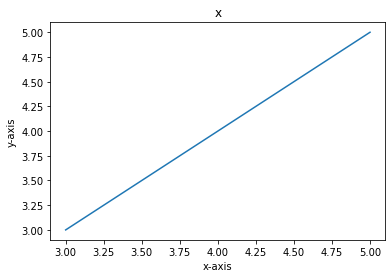

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 7.3600000000 │  8.0000000000 │                   0.0800000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


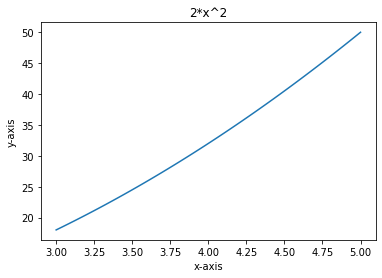

╒══════════════════╤════════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │          value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │  98.8416000000 │ 65.3333333333 │                   0.5128816327 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 101.4016000000 │ 65.3333333333 │                   0.5520653061 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 101.3333333333 │ 65.3333333333 │                   0.5510204082 │
╘══════════════════╧════════════════╧═══════════════╧════════════════════════════════╛


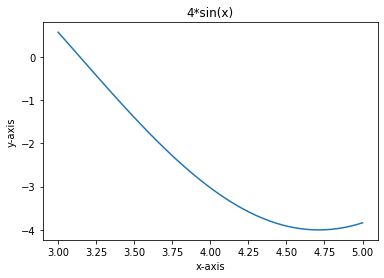

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -4.8220482029 │ -5.0946187283 │                   0.0535016534 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -5.0837455682 │ -5.0946187283 │                   0.0021342441 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -5.0946373339 │ -5.0946187283 │                   0.0000036520 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


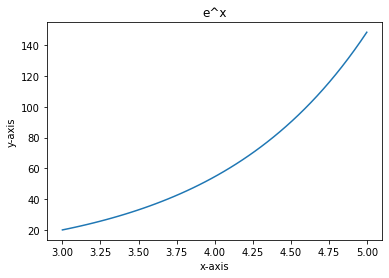

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 136.8106758371 │ 128.3276221794 │                   0.0661046586 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 148.6797455998 │ 128.3276221794 │                   0.1585950326 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 148.3639105669 │ 128.3276221794 │                   0.1561338708 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


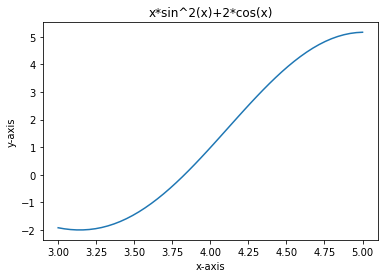

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 2.4847811826 │  2.4952814265 │                   0.0042080399 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 3.0611598032 │  2.4952814265 │                   0.2267793807 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 3.0597431139 │  2.4952814265 │                   0.2262116335 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


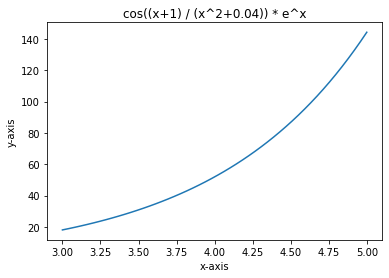

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 124.2475675006 │ 122.7670945069 │                   0.0120592004 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 135.7775097744 │ 122.7670945069 │                   0.1059764045 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 135.6083964137 │ 122.7670945069 │                   0.1045988908 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


In [56]:
calculate_integral(f1, 3, 5, 50, 'x')
calculate_integral(f2, 3, 5, 50, '2*x^2')
calculate_integral(f3, 3, 5, 50, '4*sin(x)')
calculate_integral(f4, 3, 5, 50, 'e^x')
calculate_integral(f5, 3, 5, 50, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 3, 5, 50, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [3, 5], ilości kroków 1000

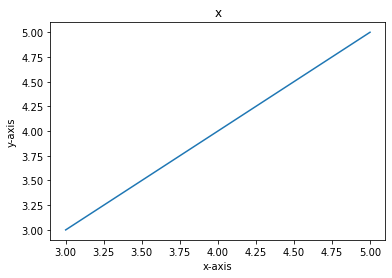

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 7.9680000000 │  8.0000000000 │                   0.0040000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


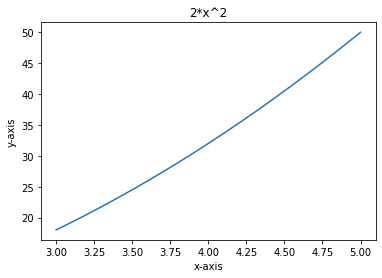

╒══════════════════╤════════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │          value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 101.2055040000 │ 65.3333333333 │                   0.5490638367 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 101.3335040000 │ 65.3333333333 │                   0.5510230204 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 101.3333333333 │ 65.3333333333 │                   0.5510204082 │
╘══════════════════╧════════════════╧═══════════════╧════════════════════════════════╛


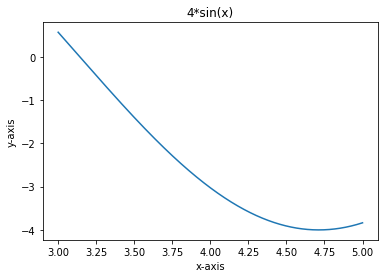

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -5.0815066887 │ -5.0946187283 │                   0.0025737038 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -5.0945915569 │ -5.0946187283 │                   0.0000053333 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -5.0946187284 │ -5.0946187283 │                   0.0000000000 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


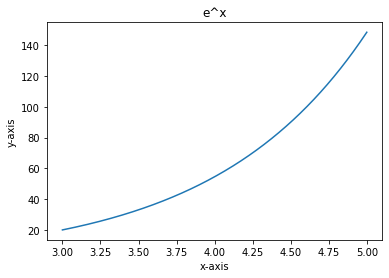

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 147.7707098165 │ 128.3276221794 │                   0.1515113216 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 148.3641633047 │ 128.3276221794 │                   0.1561358403 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 148.3633720376 │ 128.3276221794 │                   0.1561296743 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


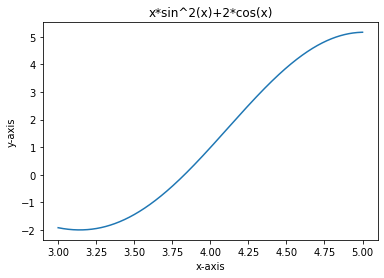

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 3.0309460124 │  2.4952814265 │                   0.2146710107 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 3.0597649434 │  2.4952814265 │                   0.2262203818 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 3.0597614586 │  2.4952814265 │                   0.2262189852 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


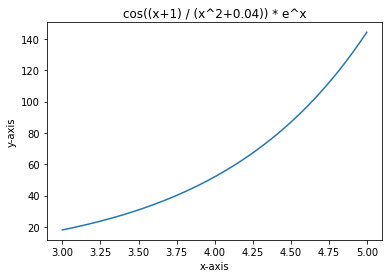

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 135.0292685199 │ 122.7670945069 │                   0.0998816015 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 135.6057656336 │ 122.7670945069 │                   0.1045774617 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 135.6049864985 │ 122.7670945069 │                   0.1045711153 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


In [57]:
calculate_integral(f1, 3, 5, 1000, 'x')
calculate_integral(f2, 3, 5, 1000, '2*x^2')
calculate_integral(f3, 3, 5, 1000, '4*sin(x)')
calculate_integral(f4, 3, 5, 1000, 'e^x')
calculate_integral(f5, 3, 5, 1000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 3, 5, 1000, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [3, 5], ilości kroków 10000

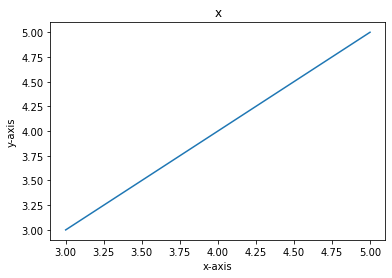

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 7.9968000000 │  8.0000000000 │                   0.0004000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 8.0000000000 │  8.0000000000 │                   0.0000000000 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


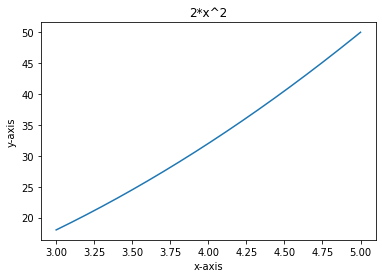

╒══════════════════╤════════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │          value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 101.3205350400 │ 65.3333333333 │                   0.5508245159 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 101.3333350400 │ 65.3333333333 │                   0.5510204343 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 101.3333333333 │ 65.3333333333 │                   0.5510204082 │
╘══════════════════╧════════════════╧═══════════════╧════════════════════════════════╛


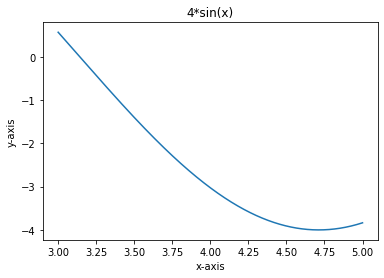

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -5.0933099697 │ -5.0946187283 │                   0.0002568904 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -5.0946184565 │ -5.0946187283 │                   0.0000000533 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -5.0946187283 │ -5.0946187283 │                   0.0000000000 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


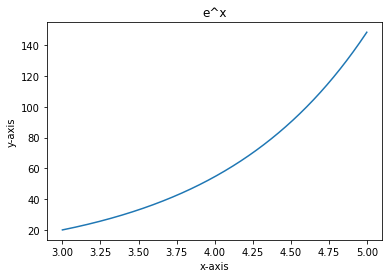

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 148.3040345981 │ 128.3276221794 │                   0.1556672841 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 148.3633799469 │ 128.3276221794 │                   0.1561297360 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 148.3633720342 │ 128.3276221794 │                   0.1561296743 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


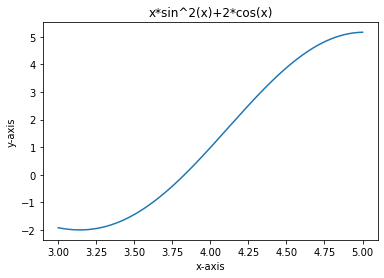

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 3.0568796005 │  2.4952814265 │                   0.2250640621 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 3.0597614936 │  2.4952814265 │                   0.2262189992 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 3.0597614587 │  2.4952814265 │                   0.2262189853 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


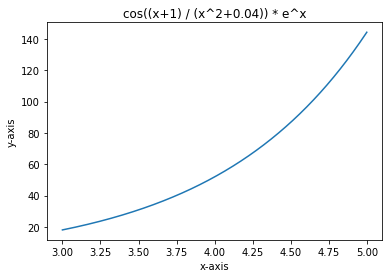

╒══════════════════╤════════════════╤════════════════╤════════════════════════════════╕
│ L.P.             │          value │    numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪════════════════╪════════════════════════════════╡
│ Rectangular rule │ 135.5473445752 │ 122.7670945069 │                   0.1041015927 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 135.6049942866 │ 122.7670945069 │                   0.1045711787 │
├──────────────────┼────────────────┼────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 135.6049864951 │ 122.7670945069 │                   0.1045711152 │
╘══════════════════╧════════════════╧════════════════╧════════════════════════════════╛


In [58]:
calculate_integral(f1, 3, 5, 10000, 'x')
calculate_integral(f2, 3, 5, 10000, '2*x^2')
calculate_integral(f3, 3, 5, 10000, '4*sin(x)')
calculate_integral(f4, 3, 5, 10000, 'e^x')
calculate_integral(f5, 3, 5, 10000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 3, 5, 10000, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [-5, 100], ilości kroków 50

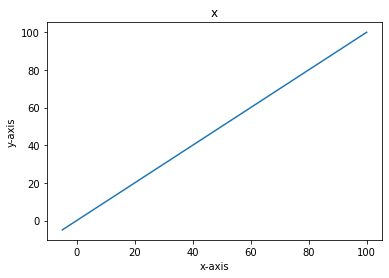

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 4897.2500000000 │ 4987.5000000000 │                   0.0180952381 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 4987.5000000000 │ 4987.5000000000 │                   0.0000000000 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 4987.5000000000 │ 4987.5000000000 │                   0.0000000000 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


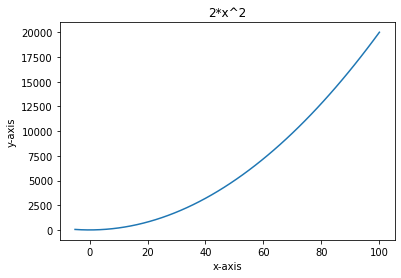

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 647745.1499999999 │ 666749.9999999999 │                   0.0285037120 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 666697.6499999999 │ 666749.9999999999 │                   0.0000785152 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 666583.3333333329 │ 666749.9999999999 │                   0.0002499688 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


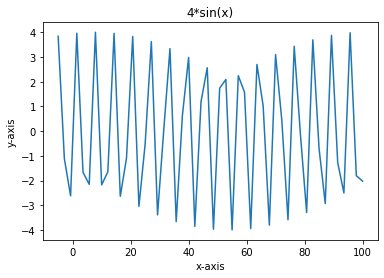

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -3.2921790343 │ -2.3146267473 │                   0.4223369008 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -1.5724562268 │ -2.3146267473 │                   0.3206437156 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -2.5974219124 │ -2.3146267473 │                   0.1221774377 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


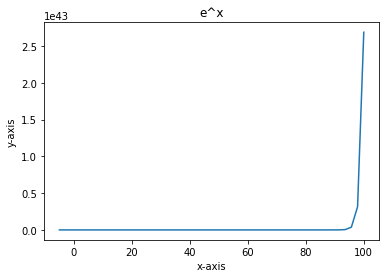

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │  8982619394888455632456261286100458820075520.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │                   0.6658397339 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 34519732242141742931644960271960997277728768.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │              

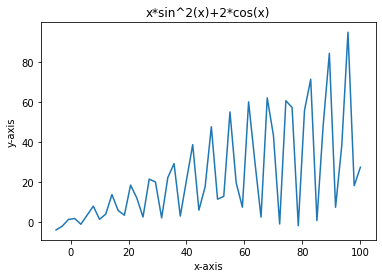

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 2458.8761550601 │ 2511.8060438097 │                   0.0210724426 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 2479.9663933207 │ 2511.8060438097 │                   0.0126759988 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 2443.0629813811 │ 2511.8060438097 │                   0.0273679819 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


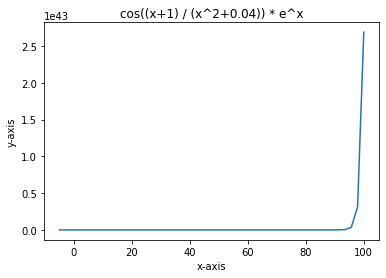

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │  8982139729729927884114085957550271251873792.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │                   0.6658401791 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 34517950078034833581202258356575236545052672.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │              

In [59]:
calculate_integral(f1, -5, 100, 50, 'x')
calculate_integral(f2, -5, 100, 50, '2*x^2')
calculate_integral(f3, -5, 100, 50, '4*sin(x)')
calculate_integral(f4, -5, 100, 50, 'e^x')
calculate_integral(f5, -5, 100, 50, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -5, 100, 50, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [-5, 100], ilości kroków 1000

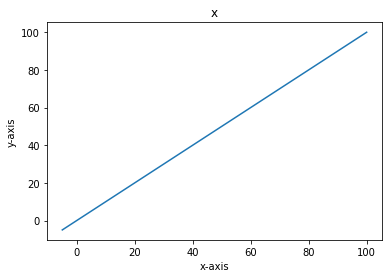

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 4982.9875000000 │ 4987.5000000000 │                   0.0009047619 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 4987.5000000000 │ 4987.5000000000 │                   0.0000000000 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 4987.5000000000 │ 4987.5000000000 │                   0.0000000000 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


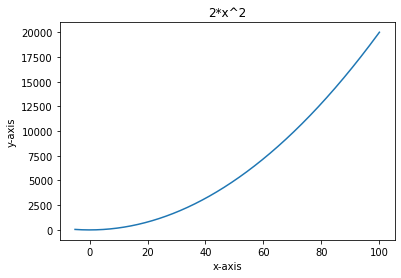

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 665635.9941249997 │ 666749.9999999999 │                   0.0016708000 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 666583.6191249997 │ 666749.9999999999 │                   0.0002495401 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 666583.3333333262 │ 666749.9999999999 │                   0.0002499688 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


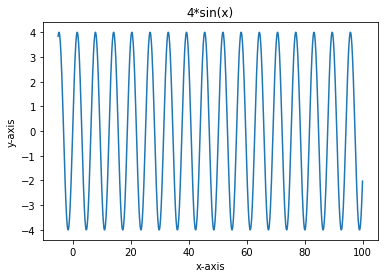

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -2.3988718336 │ -2.3146267473 │                   0.0363968343 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -2.3128856932 │ -2.3146267473 │                   0.0007521965 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -2.3146277958 │ -2.3146267473 │                   0.0000004530 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


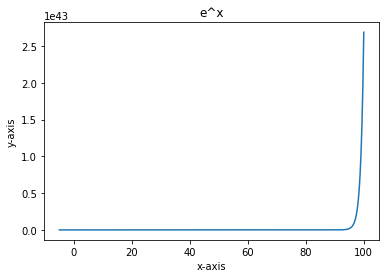

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 25624529616500262342359288830131248757211136.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │                   0.0467480298 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 26901385258862923798159631458780629667151872.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │              

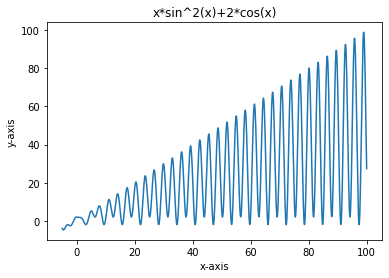

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 2514.5223767318 │ 2511.8060438097 │                   0.0010814262 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 2515.5768886448 │ 2511.8060438097 │                   0.0015012484 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 2515.6418987504 │ 2511.8060438097 │                   0.0015271302 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


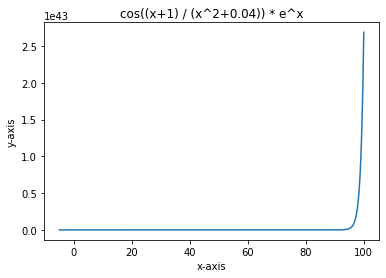

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 25623194113058468165446445758505100563709952.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │                   0.0467480787 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 26899984630473711593390795450385936479682560.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │              

In [60]:
calculate_integral(f1, -5, 100, 1000, 'x')
calculate_integral(f2, -5, 100, 1000, '2*x^2')
calculate_integral(f3, -5, 100, 1000, '4*sin(x)')
calculate_integral(f4, -5, 100, 1000, 'e^x')
calculate_integral(f5, -5, 100, 1000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -5, 100, 1000, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [-5, 100], ilości kroków 10000

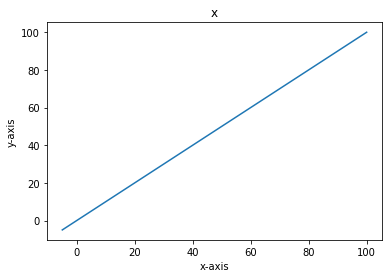

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 4987.0487500000 │ 4987.5000000000 │                   0.0000904762 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 4987.5000000000 │ 4987.5000000000 │                   0.0000000000 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 4987.4999999999 │ 4987.5000000000 │                   0.0000000000 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


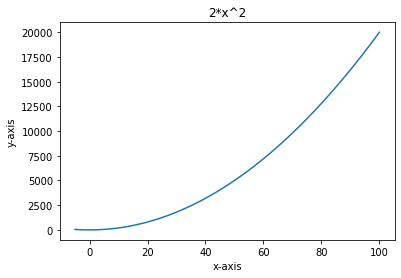

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 666488.5736912510 │ 666749.9999999999 │                   0.0003920905 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 666583.3361912509 │ 666749.9999999999 │                   0.0002499645 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 666583.3333333341 │ 666749.9999999999 │                   0.0002499688 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


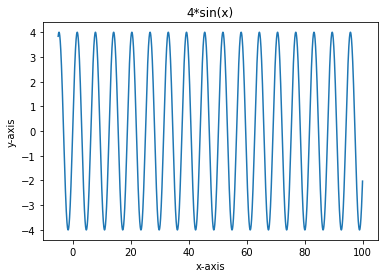

╒══════════════════╤═══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │         value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -2.3232079534 │ -2.3146267473 │                   0.0037073822 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ -2.3146093393 │ -2.3146267473 │                   0.0000075208 │
├──────────────────┼───────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -2.3146267474 │ -2.3146267473 │                   0.0000000001 │
╘══════════════════╧═══════════════╧═══════════════╧════════════════════════════════╛


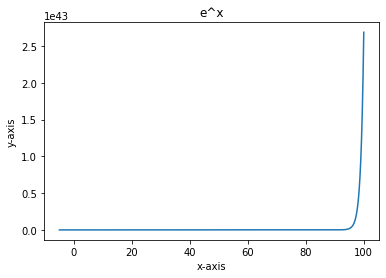

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 26753688022430966714582457312948531763347456.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │                   0.0047424792 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 26881373586667234840866554432421909692940288.0000000000 │ 26881171418161306576651829020751907589718016.0000000000 │              

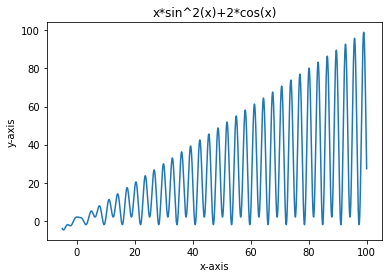

╒══════════════════╤═════════════════╤═════════════════╤════════════════════════════════╕
│ L.P.             │           value │     numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════╪═════════════════╪════════════════════════════════╡
│ Rectangular rule │ 2515.5356415837 │ 2511.8060438097 │                   0.0014848271 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 2515.6410927750 │ 2511.8060438097 │                   0.0015268094 │
├──────────────────┼─────────────────┼─────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 2515.6417409239 │ 2511.8060438097 │                   0.0015270674 │
╘══════════════════╧═════════════════╧═════════════════╧════════════════════════════════╛


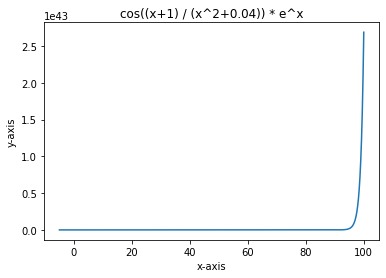

╒══════════════════╤═════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                   value │                                             numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 26752294906605627655022528729430226869682176.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │                   0.0047424842 │
├──────────────────┼─────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 26879973958347150512288916556161980582330368.0000000000 │ 26879771799944387628372865191378503832961024.0000000000 │              

In [61]:
calculate_integral(f1, -5, 100, 10000, 'x')
calculate_integral(f2, -5, 100, 10000, '2*x^2')
calculate_integral(f3, -5, 100, 10000, '4*sin(x)')
calculate_integral(f4, -5, 100, 10000, 'e^x')
calculate_integral(f5, -5, 100, 10000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, -5, 100, 10000, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [1, 500], ilości kroków 50

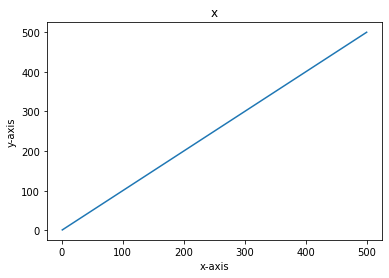

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 122489.4900000000 │ 124999.5000000000 │                   0.0200801603 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 124999.5000000000 │ 124999.5000000000 │                   0.0000000000 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 124999.5000000000 │ 124999.5000000000 │                   0.0000000000 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


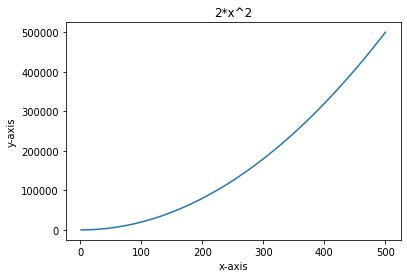

╒══════════════════╤═════════════════════╤═════════════════════╤════════════════════════════════╕
│ L.P.             │               value │         numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════╪═════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 80845110.8867999911 │ 83333332.6666666567 │                   0.0298586616 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 83350100.8667999804 │ 83333332.6666666567 │                   0.0002012184 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 83333334.0000000000 │ 83333332.6666666567 │                   0.0000000160 │
╘══════════════════╧═════════════════════╧═════════════════════╧════════════════════════════════╛


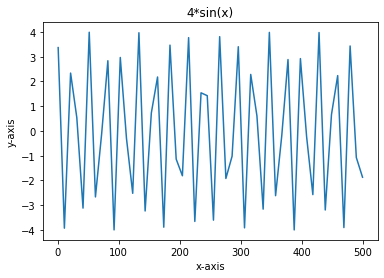

╒══════════════════╤════════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │          value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪════════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ -16.2427367104 │  5.6966063172 │                   3.8513005474 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │  -8.7538051535 │  5.6966063172 │                   2.5366701973 │
├──────────────────┼────────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ -39.7700870838 │  5.6966063172 │                   7.9813648459 │
╘══════════════════╧════════════════╧═══════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


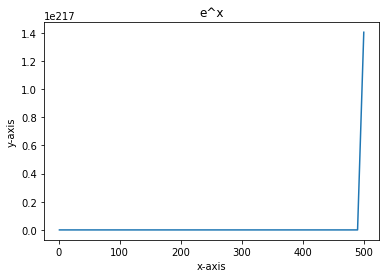

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

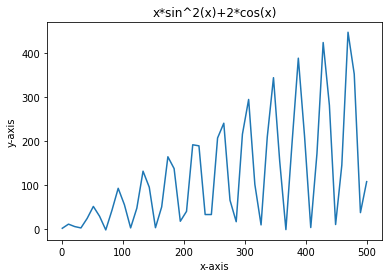

╒══════════════════╤══════════════════╤══════════════════╤════════════════════════════════╕
│ L.P.             │            value │      numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════════╪══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 60396.0445908643 │ 62393.3571333702 │                   0.0320116217 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 60933.4422468112 │ 62393.3571333702 │                   0.0233985628 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 60702.0919069628 │ 62393.3571333702 │                   0.0271064951 │
╘══════════════════╧══════════════════╧══════════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


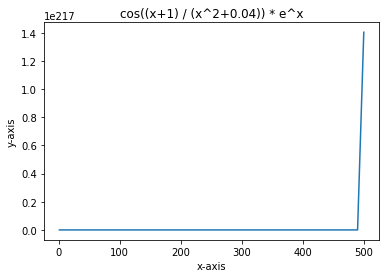

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

In [62]:
calculate_integral(f1, 1, 500, 50, 'x')
calculate_integral(f2, 1, 500, 50, '2*x^2')
calculate_integral(f3, 1, 500, 50, '4*sin(x)')
calculate_integral(f4, 1, 500, 50, 'e^x')
calculate_integral(f5, 1, 500, 50, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 1, 500, 50, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [1, 500], ilości kroków 1000

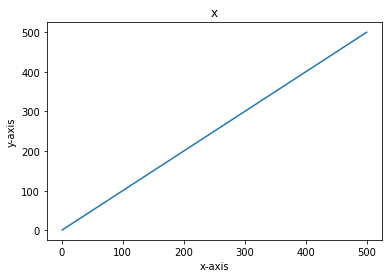

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 124873.9995000000 │ 124999.5000000000 │                   0.0010040080 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 124999.5000000000 │ 124999.5000000000 │                   0.0000000000 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 124999.5000000006 │ 124999.5000000000 │                   0.0000000000 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


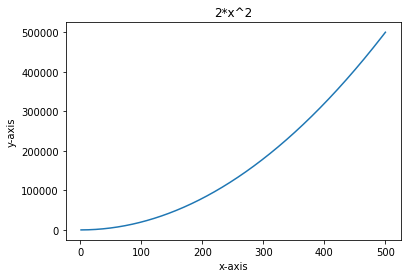

╒══════════════════╤═════════════════════╤═════════════════════╤════════════════════════════════╕
│ L.P.             │               value │         numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════╪═════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 83208126.4181669950 │ 83333332.6666666567 │                   0.0015024750 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 83333375.9171669930 │ 83333332.6666666567 │                   0.0000005190 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 83333334.0000008941 │ 83333332.6666666567 │                   0.0000000160 │
╘══════════════════╧═════════════════════╧═════════════════════╧════════════════════════════════╛


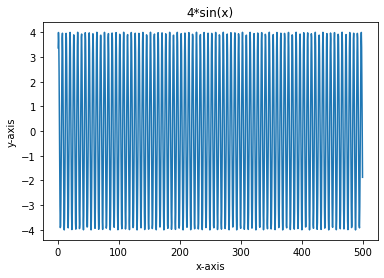

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 5.2025037865 │  5.6966063172 │                   0.0867362958 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 5.5769503643 │  5.6966063172 │                   0.0210047783 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 5.6986613671 │  5.6966063172 │                   0.0003607499 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


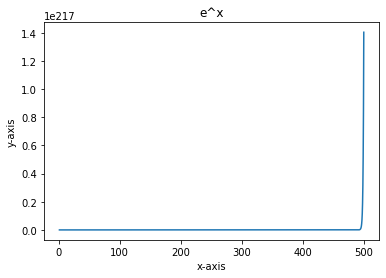

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

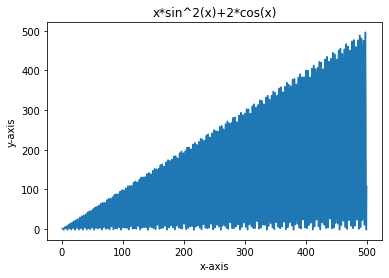

╒══════════════════╤══════════════════╤══════════════════╤════════════════════════════════╕
│ L.P.             │            value │      numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════════╪══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 62379.1228403011 │ 62393.3571333702 │                   0.0002281380 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 62405.9927230985 │ 62393.3571333702 │                   0.0002025150 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 62396.5905704459 │ 62393.3571333702 │                   0.0000518234 │
╘══════════════════╧══════════════════╧══════════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


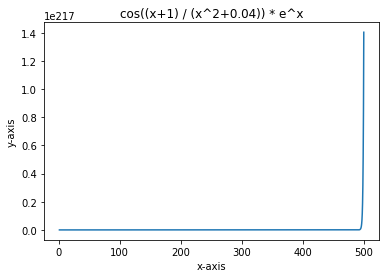

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

In [63]:
calculate_integral(f1, 1, 500, 1000, 'x')
calculate_integral(f2, 1, 500, 1000, '2*x^2')
calculate_integral(f3, 1, 500, 1000, '4*sin(x)')
calculate_integral(f4, 1, 500, 1000, 'e^x')
calculate_integral(f5, 1, 500, 1000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 1, 500, 1000, 'cos((x+1) / (x^2+0.04)) * e^x')

Sprawdzenie zachowanie implementacji dla przedziału [1, 1000], ilości kroków 10000

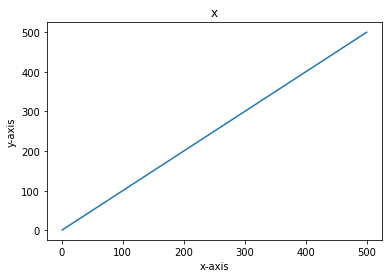

╒══════════════════╤═══════════════════╤═══════════════════╤════════════════════════════════╕
│ L.P.             │             value │       numpy value │   accuracy of calculations [%] │
╞══════════════════╪═══════════════════╪═══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 124986.9499500000 │ 124999.5000000000 │                   0.0001004008 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 124999.5000000000 │ 124999.5000000000 │                   0.0000000000 │
├──────────────────┼───────────────────┼───────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 124999.4999999926 │ 124999.5000000000 │                   0.0000000000 │
╘══════════════════╧═══════════════════╧═══════════════════╧════════════════════════════════╛


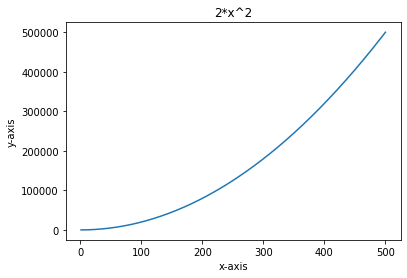

╒══════════════════╤═════════════════════╤═════════════════════╤════════════════════════════════╕
│ L.P.             │               value │         numpy value │   accuracy of calculations [%] │
╞══════════════════╪═════════════════════╪═════════════════════╪════════════════════════════════╡
│ Rectangular rule │ 83320809.4692717195 │ 83333332.6666666567 │                   0.0001502784 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 83333334.4191717207 │ 83333332.6666666567 │                   0.0000000210 │
├──────────────────┼─────────────────────┼─────────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 83333333.9999870956 │ 83333332.6666666567 │                   0.0000000160 │
╘══════════════════╧═════════════════════╧═════════════════════╧════════════════════════════════╛


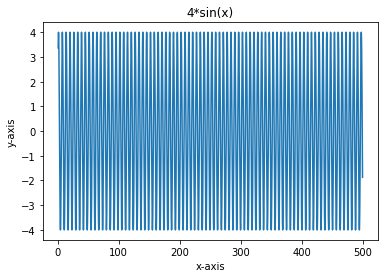

╒══════════════════╤══════════════╤═══════════════╤════════════════════════════════╕
│ L.P.             │        value │   numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════╪═══════════════╪════════════════════════════════╡
│ Rectangular rule │ 5.6579700647 │  5.6966063172 │                   0.0067823280 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 5.6954147224 │  5.6966063172 │                   0.0002091763 │
├──────────────────┼──────────────┼───────────────┼────────────────────────────────┤
│ Simpson's rule   │ 5.6966065168 │  5.6966063172 │                   0.0000000350 │
╘══════════════════╧══════════════╧═══════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


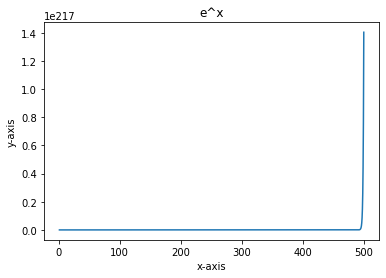

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

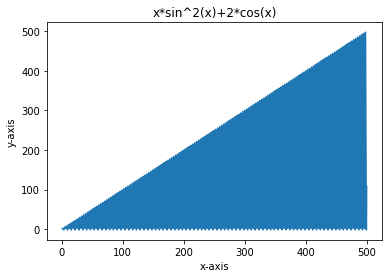

╒══════════════════╤══════════════════╤══════════════════╤════════════════════════════════╕
│ L.P.             │            value │      numpy value │   accuracy of calculations [%] │
╞══════════════════╪══════════════════╪══════════════════╪════════════════════════════════╡
│ Rectangular rule │ 62394.6415198131 │ 62393.3571333702 │                   0.0000205853 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Trapezoidal rule │ 62397.3285080928 │ 62393.3571333702 │                   0.0000636506 │
├──────────────────┼──────────────────┼──────────────────┼────────────────────────────────┤
│ Simpson's rule   │ 62397.2424068233 │ 62393.3571333702 │                   0.0000622706 │
╘══════════════════╧══════════════════╧══════════════════╧════════════════════════════════╛


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


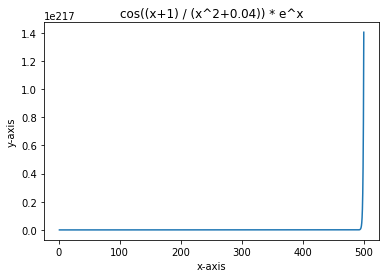

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╕
│ L.P.             │                                                                                                                                                                                                                                 value │                                                                                                                                                                                                                           numpy value

In [64]:
calculate_integral(f1, 1, 500, 10000, 'x')
calculate_integral(f2, 1, 500, 10000, '2*x^2')
calculate_integral(f3, 1, 500, 10000, '4*sin(x)')
calculate_integral(f4, 1, 500, 10000, 'e^x')
calculate_integral(f5, 1, 500, 10000, 'x*sin^2(x)+2*cos(x)')
calculate_integral(f6, 1, 500, 10000, 'cos((x+1) / (x^2+0.04)) * e^x')